# Problem 1
Modify the classes AdalineGD and LogisticRegressionGD in the textbook such that the bias
data field b is absorbed by the weight vector w . Your program is required to be compatible with the training
programs in the textbook.

In [2]:
import numpy as np

In [3]:
class AdalineGD(object):
    """
    ADApative LInear NEuron Classifier
    Params: 
    eta (float) : Learning rate (between 0.0 and 1.0)
    n_iter (int) : Number of passes over the training dataset.
    random_state (int) : Random number generator seed for random weight initialization.

    Attrs:
    w_ (1d-array) : Weights after fitting.
    cost_ (list) : Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_inter=50, random_state=1):
        self.eta = eta
        self.n_inter = n_inter
        self.random_state = random_state
    def fit(self, X, y):
        """
        Fitting Training Data
        Params:
        X {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples is the number of examples and n_features is the number of features.
        y (array-like) ,shape = [n_examples]
        Target values.

        Returns:
        self : Object
        """
        #TODO add a column of 1's to X to properly absorb.
        n = X.shape[0] 
        m = X.shape[1] #number of features in dataset
        x_0 = np.ones((n,1))
        X = np.hstack((x_0,X))
        
        rand_gen = np.random.RandomState(self.random_state)
        self.w_ = rand_gen.normal(loc=0.0, scale=0.01,
                                  size=1 + m) #small random numbers
                                              #drawn from a normal distrib.
                                              #with std dev 0.01
        self.cost_ = []

        for _ in range(self.n_inter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_  += self.eta * X.T.dot(errors)
            
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)

        return self
    def net_input(self, X):
        """Calculate net input"""
        #return np.dot(X, self.w_[1:]) + self.w_[0]
        return np.dot(X, self.w_)

    def activation(self, X):
        """Computer Linear Activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        n = X.shape[0] 
        m = X.shape[1] #number of features in dataset
        x_0 = np.ones((n,1))
        X = np.hstack((x_0,X))
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [4]:
class LogisticRegressionGD(object):
    """
    Gradient descent-based logistic regression classifier
    Params: 
    eta (float) : Learning rate (between 0.0 and 1.0)
    n_iter (int) : Number of passes over the training dataset.
    random_state (int) : Random number generator seed for random weight initialization.

    Attrs:
    w_ (1d-array) : Weights after fitting with bias absorbed at X[0].
    losses_ (list) : Mean squared error loss function values in each epoch.
    """
    def __init__(self, eta=0.01, n_inter=50, random_state=1):
        self.eta = eta
        self.n_inter = n_inter
        self.random_state = random_state
    def fit(self, X, y):
        """
        Fitting Training Data
        Params:
        X {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples is the number of examples and n_features is the number of features.
        y (array-like) ,shape = [n_examples]
        Target values.

        Returns:
        self : Instance of LogisticRegressionGD
        """
        #TODO add a column of 1's to X to properly absorb.
        n = X.shape[0] 
        m = X.shape[1] #number of features in dataset
        x_0 = np.ones((n,1))
        X = np.hstack((x_0,X))

        
        rand_gen = np.random.RandomState(self.random_state)
        self.w_ = rand_gen.normal(loc=0.0, scale=0.01,
                                  size=1 + m) #m + 1 to account for the
                                              #absorbed bias
        
        self.losses_ = []


        for _ in range(self.n_inter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_  += self.eta * 2.0 * X.T.dot(errors) / n
            loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
                   )/ n
            self.losses_.append(loss)

        return self
    def net_input(self, X):
        """Calculate net input"""
        #return np.dot(X, self.w_[1:]) + self.w_[0]
        return np.dot(X, self.w_)

    def activation(self, X):
        """Computer Linear Activation"""
        return 1. / (1. + np.exp(-np.clip(X, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        n = X.shape[0]
        m = X.shape[1] #number of features in dataset
        x_0 = np.ones((n,1))
        X = np.hstack((x_0,X))
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y = X[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

In [6]:
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases',
                 'iris','iris.data')
print('URL:', s)
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

#select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [7]:
#standarize
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

/var/folders/q8/dkdmw0695vz4xd77f20xf2h00000gp/T/ipykernel_16002/3419362327.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


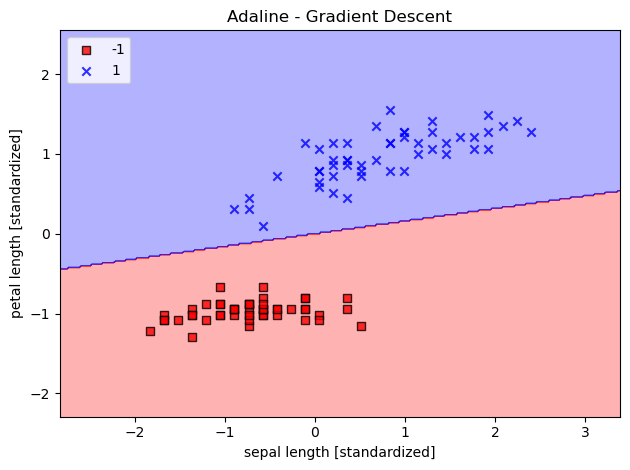

In [8]:
ada_gd = AdalineGD(n_inter=100, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases',
                 'iris','iris.data')
print('URL:', s)
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

#select setosa and versicolor
y = df.iloc[0:100, 4].values



#extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values
y = np.where(y == 'Iris-setosa', 0, 1)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


/var/folders/q8/dkdmw0695vz4xd77f20xf2h00000gp/T/ipykernel_16002/3419362327.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


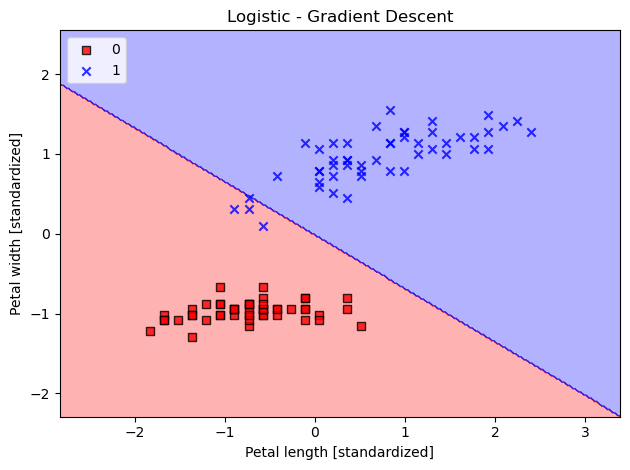

In [10]:
lrgd = LogisticRegressionGD(eta=0.01,
                             n_inter=100,
                             random_state=1)
lrgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=lrgd)

plt.title('Logistic - Gradient Descent')
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# ANSWER 1 WOULD GO HERE

# Problem 2
Compare the performance of Adaline and logistic regression (bias absorbed versions) on the Iris
and Wine datasets that can be obtained from the UCI machine learning repository. You may use the Python
program given in our textbook (Page 117) to import the datasets.
- Iris dataset - You may consider the samples with the labels setosa, versicolor to form a training set for binary classification.
- Wine dataset - You may consider the samples with in the first two classes (1 and 2) to form a training set for binary classification.

The comparisons should be done based on the convergence of the loss. In order to make apple-to-apple comparisons, you should use the same hyperparameters and number of epochs for both learning algorithms.

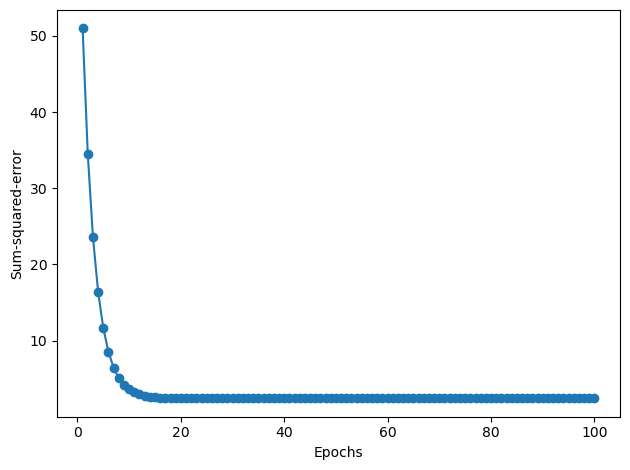

In [13]:
plt.plot(range(1, len(ada_gd.cost_) + 1),
         ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

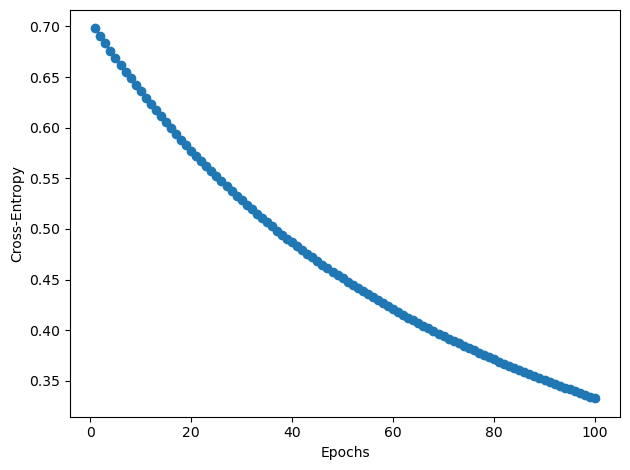

In [14]:
plt.plot(range(1, len(lrgd.losses_) + 1),
         lrgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.tight_layout()
plt.show()

# ANSWER 2 WOULD GO HERE